In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
from kaggle.api.kaggle_api_extended import KaggleApi

# Path to kaggle.json file
kaggle_json_path = os.path.expanduser("C:/Users/sammy/.kaggle/kaggle.json")  # Adjust if necessary

# Ensure the Kaggle API can authenticate
if not os.path.exists(kaggle_json_path):
    raise FileNotFoundError("kaggle.json file not found at the specified path.")

# Set Kaggle API credentials using kaggle.json
with open(kaggle_json_path, "r") as f:
    credentials = json.load(f)
os.environ['KAGGLE_USERNAME'] = credentials['username']
os.environ['KAGGLE_KEY'] = credentials['key']

# Authenticate and download the dataset
api = KaggleApi()
api.authenticate()

# Specify the dataset and download path
dataset_id = "gpreda/covid-world-vaccination-progress"  # Replace with the specific dataset name on Kaggle
cache_dir = os.path.expanduser("C:/Users/sammy/OneDrive/Documents/Portfolio")
os.makedirs(cache_dir, exist_ok=True)

# Download and unzip the dataset
api.dataset_download_files(dataset_id, path=cache_dir, unzip=True)

# Load the dataset
data_path = os.path.join(cache_dir, "country_vaccinations.csv")  # Adjust based on dataset's file name
covid_data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(covid_data.head())
print(covid_data.info())

Dataset URL: https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress
       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

 

In [42]:
# Check for missing values
print(covid_data.isnull().sum())

# Fill or drop missing values as appropriate
covid_data.fillna(0, inplace=True)  # Simplified approach; adjust based on data exploration

# Convert date columns to datetime format if not already
covid_data['date'] = pd.to_datetime(covid_data['date'])

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64


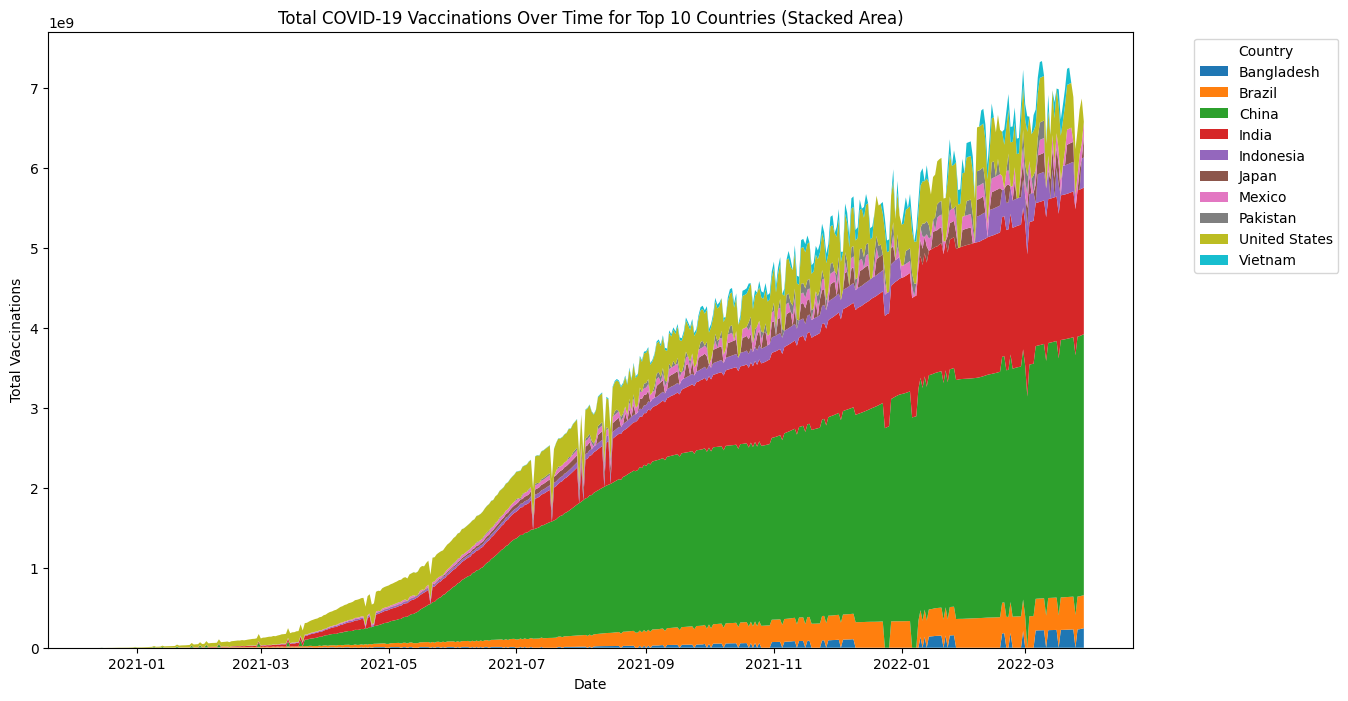

In [43]:
# Aggregate the total vaccinations per country over time
country_vaccination_trends = covid_data.groupby(['country', 'date']).agg(
    {'total_vaccinations': 'max'}).reset_index()

# Get top 10 countries by total vaccinations
top_countries = covid_data.groupby('country')['total_vaccinations'].max().nlargest(10).index

# Filter data for only the top 10 countries
top_country_vaccination_trends = country_vaccination_trends[country_vaccination_trends['country'].isin(top_countries)]

# Pivot data to wide format for stacked area plot
pivot_data = top_country_vaccination_trends.pivot(index='date', columns='country', values='total_vaccinations').fillna(0)

# Plot as a stacked area chart
plt.figure(figsize=(14, 8))
plt.stackplot(pivot_data.index, pivot_data.T, labels=pivot_data.columns)

# Customize the plot
plt.title("Total COVID-19 Vaccinations Over Time for Top 10 Countries (Stacked Area)")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()


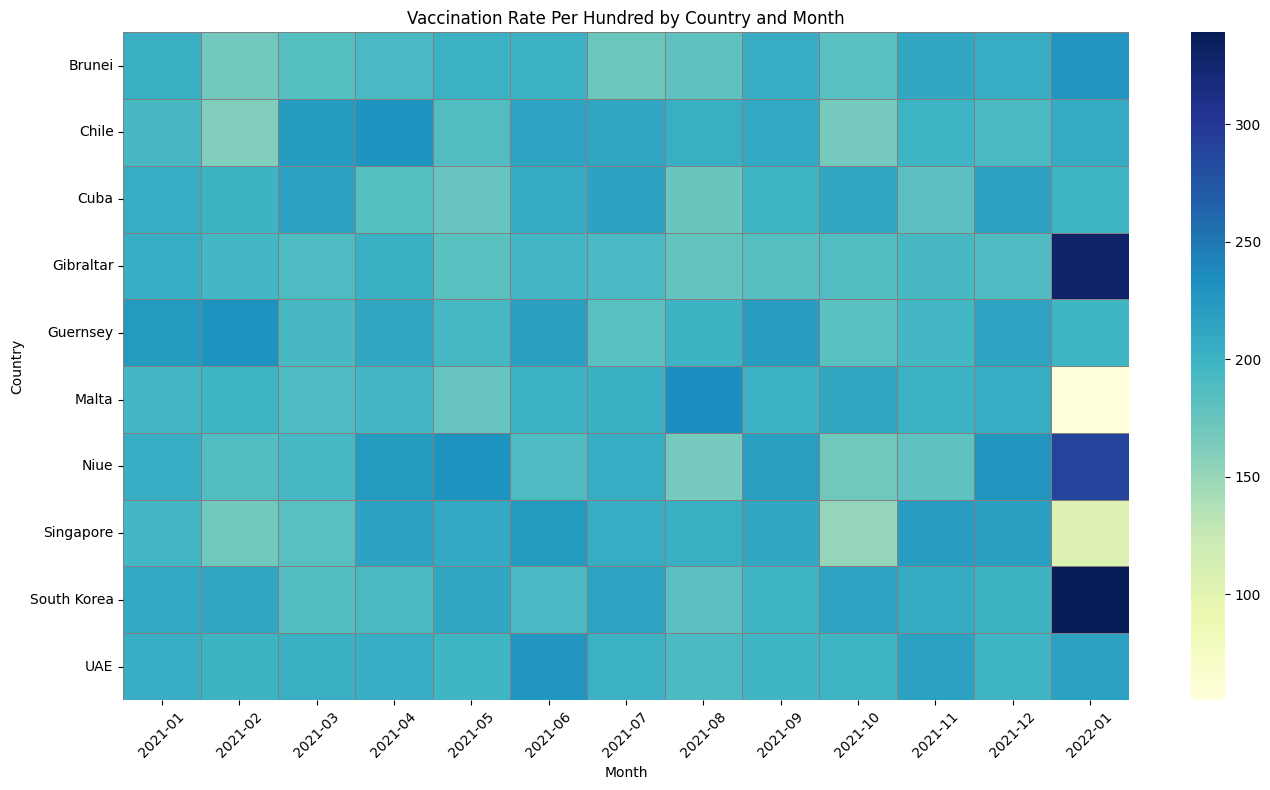

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample structure of covid_data assuming it has 'date', 'country', and 'total_vaccinations_per_hundred' columns
# Note: Replace this with your actual data loading code
date_range = pd.date_range(start="2021-01-01", end="2022-01-01", freq="D")
countries = ['Brunei', 'Chile', 'Cuba', 'Gibraltar', 'Guernsey', 'Malta', 'Niue', 'Singapore', 'South Korea', 'UAE']

# Generate synthetic data for demonstration
data = {
    "date": np.tile(date_range, len(countries)),
    "country": np.repeat(countries, len(date_range)),
    "total_vaccinations_per_hundred": np.random.randint(50, 350, size=len(date_range) * len(countries))
}
data = pd.DataFrame(data)

# Calculate vaccination rates per hundred by country
data['vaccination_rate_per_hundred'] = data['total_vaccinations_per_hundred']

# Select top countries by maximum vaccination rate for clarity
top_countries = data.groupby('country')['vaccination_rate_per_hundred'].max().nlargest(10).index
filtered_data = data[data['country'].isin(top_countries)]

# Convert date to month to aggregate data for heatmap
filtered_data['Month'] = filtered_data['date'].dt.to_period('M')

# Pivot the data to have countries as rows, months as columns, and mean vaccination rate as values
pivot_table = filtered_data.pivot_table(index="country", columns="Month", values="vaccination_rate_per_hundred", aggfunc="mean")

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, linecolor="grey")
plt.title("Vaccination Rate Per Hundred by Country and Month")
plt.xlabel("Month")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


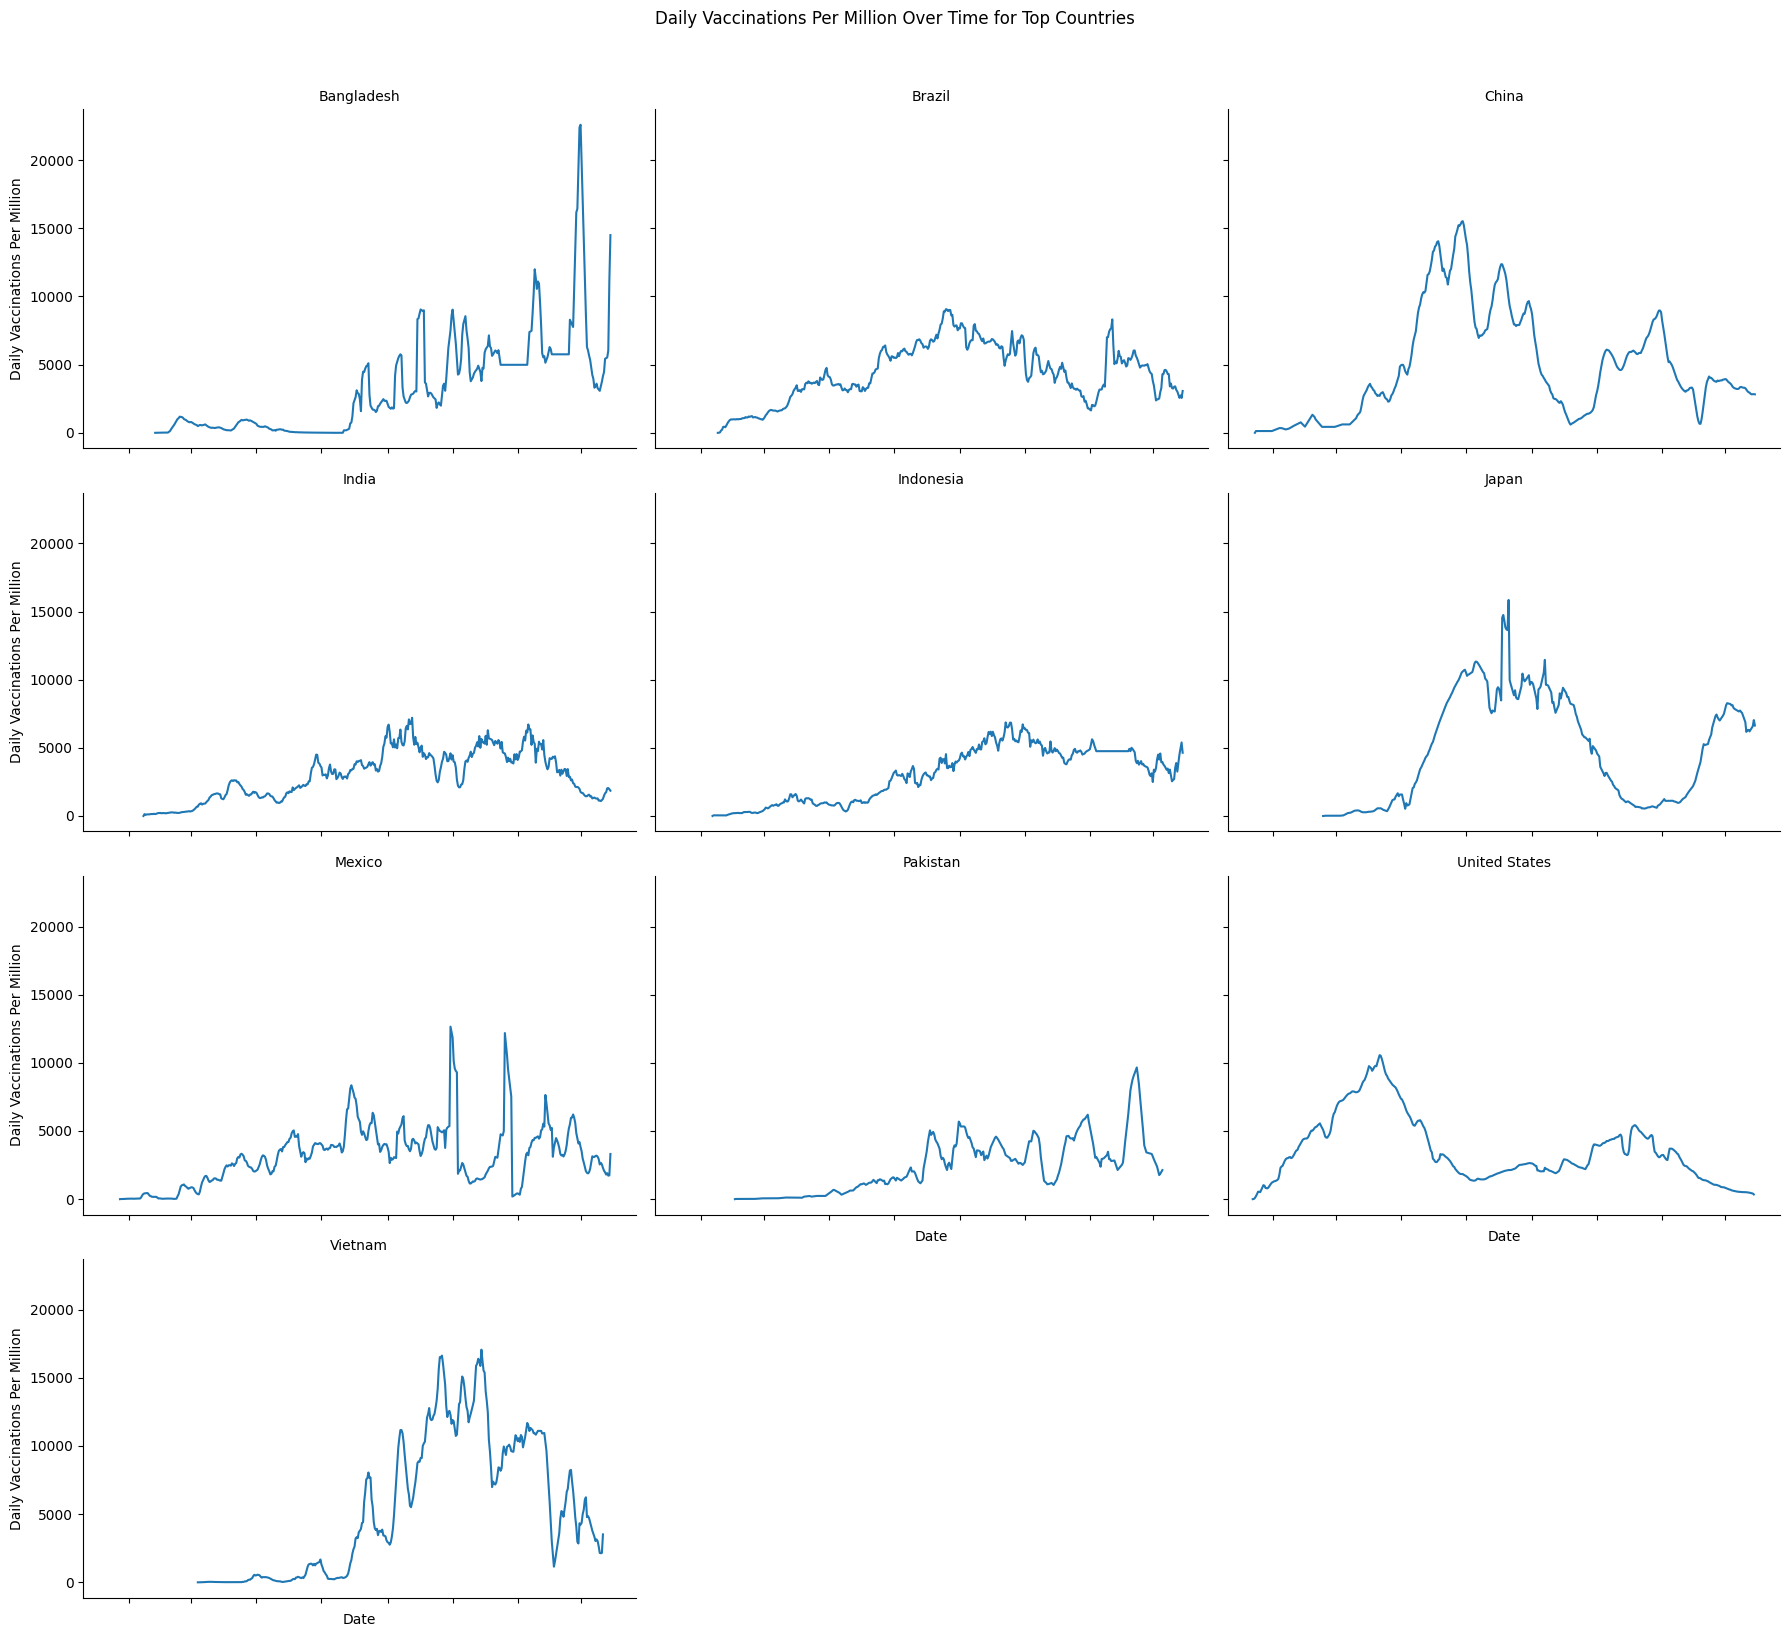

In [45]:
# Plot daily vaccination rates per million for select countries

# Aggregate the total vaccinations per country over time
country_vaccination_trends = covid_data.groupby(['country', 'date']).agg(
    {'total_vaccinations': 'max'}).reset_index()

# Get top 10 countries by total vaccinations
top_countries = covid_data.groupby('country')['total_vaccinations'].max().nlargest(10).index

# Filter data for only the top 10 countries
top_country_vaccination_trends = covid_data[covid_data['country'].isin(top_countries)]

# Initialize a FacetGrid to create small multiples, one for each country
g = sns.FacetGrid(top_country_vaccination_trends, col="country", col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, "date", "daily_vaccinations_per_million")

# Set common plot labels and adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Daily Vaccinations Per Million")
g.fig.suptitle("Daily Vaccinations Per Million Over Time for Top Countries", y=1.02)
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()
